In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Загрузка данных
data = pd.read_csv('2_0_X.csv', sep=';')
data


,X..commit,X..memused,X..swpcad,X..swpused,X..vmeff,X.dev.mapper.cloud..2.root_.Iused,X.dev.mapper.cloud..2.root_.fsused,X.dev.mapper.cloud..2.root_.ufsused,X.dev.sda1_.Iused,X.dev.sda1_.fsused,...,temp1_.temp,temp1_degC,temp2_.temp,temp2_degC,temp3_.temp,temp3_degC,temp4_.temp,temp4_degC,tps,wtps
0,27.31,92.74,19.33,0.33,0.0,2.17,52.10,57.19,0.25,38.91,...,30.00,21.00,29.29,20.50,31.43,22.00,31.43,22.00,10.0,4.0
1,27.31,92.75,19.33,0.33,0.0,2.17,52.10,57.19,0.25,38.91,...,30.36,21.25,29.11,20.38,31.79,22.25,31.79,22.25,14.0,0.0
2,27.31,92.76,19.33,0.33,0.0,2.17,52.10,57.19,0.25,38.91,...,30.18,21.12,29.64,20.75,32.14,22.50,32.14,22.50,15.0,5.0
3,27.31,92.77,19.33,0.33,0.0,2.17,52.10,57.19,0.25,38.91,...,30.71,21.50,29.29,20.50,32.14,22.50,32.14,22.50,14.0,0.0
4,27.31,92.75,19.34,0.33,0.0,2.17,52.10,57.19,0.25,38.91,...,30.71,21.50,29.29,20.50,32.14,22.50,32.14,22.50,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19439,27.53,99.63,50.39,0.71,0.0,2.17,52.93,58.01,0.25,38.91,...,30.71,21.50,27.86,19.50,32.86,23.00,32.86,23.00,0.0,0.0
19440,27.53,99.63,50.39,0.71,0.0,2.17,52.93,58.01,0.25,38.91,...,30.18,21.12,28.21,19.75,32.86,23.00,32.86,23.00,0.0,0.0
19441,27.53,99.63,50.39,0.71,0.0,2.17,52.93,58.01,0.25,38.91,...,30.71,21.50,27.86,19.50,32.86,23.00,32.86,23.00,0.0,0.0
19442,27.53,99.54,57.81,0.87,0.0,2.17,52.93,58.01,0.25,38.91,...,30.71,21.50,28.04,19.62,32.68,22.88,32.68,22.88,0.0,0.0


In [2]:
threshold = 0.9

# Создание списка столбцов для удаления
columns_to_drop = []
total_rows = len(data)
for column in data.columns:
    value_counts = data[column].value_counts(normalize=True)  # Подсчет относительной частоты значений
    if value_counts.iloc[0] > threshold:
        columns_to_drop.append(column)

# Удаление столбцов, в которых более 90% значений одинаковые
data = data.drop(columns=columns_to_drop)

# Вывод информации о удаленных столбцах
print(f"Удалены следующие столбцы: {', '.join(columns_to_drop)}")
data

Удалены следующие столбцы: X..vmeff, X.dev.mapper.cloud..2.root_.Iused, X.dev.sda1_.Iused, X.dev.sda1_.fsused, X.dev.sda1_.ufsused, all_..irq, all_MHz, bufpg.s, cpu0_MHz, cpu10_.iowait, cpu10_.soft, cpu10_MHz, cpu11_.iowait, cpu11_.usr, cpu11_MHz, cpu12_.iowait, cpu12_.soft, cpu12_MHz, cpu13_.iowait, cpu13_MHz, cpu14_.iowait, cpu14_.soft, cpu14_MHz, cpu15_.iowait, cpu15_.soft, cpu15_MHz, cpu16_.iowait, cpu16_.soft, cpu16_MHz, cpu17_.iowait, cpu17_MHz, cpu18_.iowait, cpu18_.soft, cpu18_MHz, cpu19_.iowait, cpu19_MHz, cpu1_.iowait, cpu1_.soft, cpu1_.usr, cpu1_MHz, cpu20_.iowait, cpu20_.soft, cpu20_MHz, cpu21_MHz, cpu22_.iowait, cpu22_.soft, cpu22_MHz, cpu23_.iowait, cpu23_MHz, cpu2_MHz, cpu3_.iowait, cpu3_.soft, cpu3_.usr, cpu3_MHz, cpu4_.iowait, cpu4_.soft, cpu4_MHz, cpu5_.iowait, cpu5_.usr, cpu5_MHz, cpu6_.iowait, cpu6_.soft, cpu6_MHz, cpu7_.iowait, cpu7_.usr, cpu7_MHz, cpu8_.irq, cpu8_MHz, cpu9_.iowait, cpu9_.sys, cpu9_.usr, cpu9_MHz, dev252.1_.util, dev252.1_avgqu.sz, dev252.1_await, 

,X..commit,X..memused,X..swpcad,X..swpused,X.dev.mapper.cloud..2.root_.fsused,X.dev.mapper.cloud..2.root_.ufsused,all_..idle,all_..iowait,all_..soft,all_..sys,...,temp1_.temp,temp1_degC,temp2_.temp,temp2_degC,temp3_.temp,temp3_degC,temp4_.temp,temp4_degC,tps,wtps
0,27.31,92.74,19.33,0.33,52.10,57.19,98.33,0.13,0.00,0.54,...,30.00,21.00,29.29,20.50,31.43,22.00,31.43,22.00,10.0,4.0
1,27.31,92.75,19.33,0.33,52.10,57.19,98.70,0.17,0.00,0.29,...,30.36,21.25,29.11,20.38,31.79,22.25,31.79,22.25,14.0,0.0
2,27.31,92.76,19.33,0.33,52.10,57.19,97.99,0.21,0.00,0.50,...,30.18,21.12,29.64,20.75,32.14,22.50,32.14,22.50,15.0,5.0
3,27.31,92.77,19.33,0.33,52.10,57.19,98.32,0.25,0.00,0.38,...,30.71,21.50,29.29,20.50,32.14,22.50,32.14,22.50,14.0,0.0
4,27.31,92.75,19.34,0.33,52.10,57.19,98.33,0.08,0.04,0.38,...,30.71,21.50,29.29,20.50,32.14,22.50,32.14,22.50,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19439,27.53,99.63,50.39,0.71,52.93,58.01,99.58,0.04,0.04,0.25,...,30.71,21.50,27.86,19.50,32.86,23.00,32.86,23.00,0.0,0.0
19440,27.53,99.63,50.39,0.71,52.93,58.01,99.67,0.00,0.00,0.25,...,30.18,21.12,28.21,19.75,32.86,23.00,32.86,23.00,0.0,0.0
19441,27.53,99.63,50.39,0.71,52.93,58.01,99.38,0.00,0.00,0.50,...,30.71,21.50,27.86,19.50,32.86,23.00,32.86,23.00,0.0,0.0
19442,27.53,99.54,57.81,0.87,52.93,58.01,99.58,0.04,0.00,0.25,...,30.71,21.50,28.04,19.62,32.68,22.88,32.68,22.88,0.0,0.0


In [3]:
columns_with_cpu = [col for col in data.columns if 'cpu' in col]

# Удаление столбцов, содержащих 'cpu'
data = data.drop(columns=columns_with_cpu, axis=1)
data

,X..commit,X..memused,X..swpcad,X..swpused,X.dev.mapper.cloud..2.root_.fsused,X.dev.mapper.cloud..2.root_.ufsused,all_..idle,all_..iowait,all_..soft,all_..sys,...,temp1_.temp,temp1_degC,temp2_.temp,temp2_degC,temp3_.temp,temp3_degC,temp4_.temp,temp4_degC,tps,wtps
0,27.31,92.74,19.33,0.33,52.10,57.19,98.33,0.13,0.00,0.54,...,30.00,21.00,29.29,20.50,31.43,22.00,31.43,22.00,10.0,4.0
1,27.31,92.75,19.33,0.33,52.10,57.19,98.70,0.17,0.00,0.29,...,30.36,21.25,29.11,20.38,31.79,22.25,31.79,22.25,14.0,0.0
2,27.31,92.76,19.33,0.33,52.10,57.19,97.99,0.21,0.00,0.50,...,30.18,21.12,29.64,20.75,32.14,22.50,32.14,22.50,15.0,5.0
3,27.31,92.77,19.33,0.33,52.10,57.19,98.32,0.25,0.00,0.38,...,30.71,21.50,29.29,20.50,32.14,22.50,32.14,22.50,14.0,0.0
4,27.31,92.75,19.34,0.33,52.10,57.19,98.33,0.08,0.04,0.38,...,30.71,21.50,29.29,20.50,32.14,22.50,32.14,22.50,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19439,27.53,99.63,50.39,0.71,52.93,58.01,99.58,0.04,0.04,0.25,...,30.71,21.50,27.86,19.50,32.86,23.00,32.86,23.00,0.0,0.0
19440,27.53,99.63,50.39,0.71,52.93,58.01,99.67,0.00,0.00,0.25,...,30.18,21.12,28.21,19.75,32.86,23.00,32.86,23.00,0.0,0.0
19441,27.53,99.63,50.39,0.71,52.93,58.01,99.38,0.00,0.00,0.50,...,30.71,21.50,27.86,19.50,32.86,23.00,32.86,23.00,0.0,0.0
19442,27.53,99.54,57.81,0.87,52.93,58.01,99.58,0.04,0.00,0.25,...,30.71,21.50,28.04,19.62,32.68,22.88,32.68,22.88,0.0,0.0


In [4]:
columns_with_cpu

['cpu0_.idle',
 'cpu0_.iowait',
 'cpu0_.soft',
 'cpu0_.sys',
 'cpu0_.usr',
 'cpu10_.idle',
 'cpu10_.sys',
 'cpu10_.usr',
 'cpu11_.idle',
 'cpu11_.sys',
 'cpu12_.idle',
 'cpu12_.sys',
 'cpu12_.usr',
 'cpu13_.idle',
 'cpu13_.sys',
 'cpu13_.usr',
 'cpu14_.idle',
 'cpu14_.sys',
 'cpu14_.usr',
 'cpu15_.idle',
 'cpu15_.sys',
 'cpu15_.usr',
 'cpu16_.idle',
 'cpu16_.sys',
 'cpu16_.usr',
 'cpu17_.idle',
 'cpu17_.sys',
 'cpu17_.usr',
 'cpu18_.idle',
 'cpu18_.sys',
 'cpu18_.usr',
 'cpu19_.idle',
 'cpu19_.sys',
 'cpu19_.usr',
 'cpu1_.idle',
 'cpu1_.sys',
 'cpu20_.idle',
 'cpu20_.sys',
 'cpu20_.usr',
 'cpu21_.idle',
 'cpu21_.sys',
 'cpu21_.usr',
 'cpu22_.idle',
 'cpu22_.sys',
 'cpu22_.usr',
 'cpu23_.idle',
 'cpu23_.sys',
 'cpu23_.usr',
 'cpu2_.idle',
 'cpu2_.iowait',
 'cpu2_.soft',
 'cpu2_.sys',
 'cpu2_.usr',
 'cpu3_.idle',
 'cpu3_.sys',
 'cpu4_.idle',
 'cpu4_.sys',
 'cpu4_.usr',
 'cpu5_.idle',
 'cpu5_.sys',
 'cpu6_.idle',
 'cpu6_.sys',
 'cpu6_.usr',
 'cpu7_.idle',
 'cpu7_.sys',
 'cpu8_.idle',
 'cp

In [5]:
data.describe()

,X..commit,X..memused,X..swpcad,X..swpused,X.dev.mapper.cloud..2.root_.fsused,X.dev.mapper.cloud..2.root_.ufsused,all_..idle,all_..iowait,all_..soft,all_..sys,...,temp1_.temp,temp1_degC,temp2_.temp,temp2_degC,temp3_.temp,temp3_degC,temp4_.temp,temp4_degC,tps,wtps
count,19444.000000,19444.000000,19444.000000,19444.000000,19444.000000,19444.000000,19444.000000,1.944400e+04,19444.000000,19444.000000,...,19444.000000,19444.000000,19444.000000,19444.000000,19444.000000,19444.000000,19444.000000,19444.000000,19444.000000,19444.000000
mean,27.495771,96.969373,23.783751,0.383783,52.533388,57.618770,99.213017,1.848066e+04,0.036758,0.381863,...,31.897359,22.328202,30.090209,21.063159,33.663944,23.564377,33.664194,23.564549,6.784237,1.378477
std,0.061363,1.579630,15.818181,0.143050,0.193698,0.193717,1.084729,1.822145e+06,0.041576,0.656818,...,0.657906,0.460425,0.846914,0.593599,0.630667,0.441312,0.630307,0.441064,15.059400,5.190323
min,27.310000,92.740000,15.390000,0.310000,52.100000,57.190000,78.590000,0.000000e+00,0.000000,0.040000,...,29.640000,20.750000,26.790000,18.750000,31.430000,22.000000,31.430000,22.000000,0.000000,0.000000
25%,27.480000,95.910000,15.450000,0.310000,52.390000,57.480000,99.160000,0.000000e+00,0.000000,0.250000,...,31.430000,22.000000,29.290000,20.500000,33.210000,23.250000,33.210000,23.250000,1.000000,0.000000
50%,27.520000,97.040000,15.610000,0.310000,52.530000,57.620000,99.370000,4.000000e-02,0.040000,0.330000,...,31.960000,22.380000,30.000000,21.000000,33.570000,23.500000,33.570000,23.500000,3.000000,0.000000
75%,27.530000,98.180000,15.710000,0.310000,52.680000,57.760000,99.500000,8.000000e-02,0.040000,0.420000,...,32.140000,22.500000,30.710000,21.500000,34.290000,24.000000,34.290000,24.000000,8.000000,0.000000
max,27.560000,99.630000,57.810000,0.870000,52.930000,58.010000,99.960000,1.798563e+08,0.290000,14.520000,...,35.540000,24.880000,32.680000,22.880000,35.890000,25.120000,35.890000,25.120000,655.000000,140.000000


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib

# Создаем пустой словарь для хранения метрик для каждого столбца
metrics_dict = {}
models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in data.columns:
    # Выбираем текущий столбец как целевую переменную
    X = data.drop(column, axis=1)
    y = data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train, y_train)
    models_dict[column] = regressor
    joblib.dump(regressor, f'model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


X..commit
X..memused
X..swpcad
X..swpused
X.dev.mapper.cloud..2.root_.fsused
X.dev.mapper.cloud..2.root_.ufsused
all_..idle
all_..iowait
all_..soft
all_..sys
all_..usr
bread.s
bwrtn.s
campg.s
cswch.s
dev252.0_.util
dev252.0_avgqu.sz
dev252.0_avgrq.sz
dev252.0_await
dev252.0_rd_sec.s
dev252.0_svctm
dev252.0_tps
dev252.0_wr_sec.s
dev8.0_.util
dev8.0_avgqu.sz
dev8.0_avgrq.sz
dev8.0_await
dev8.0_rd_sec.s
dev8.0_svctm
dev8.0_tps
dev8.0_wr_sec.s
dev8.5_.util
dev8.5_avgqu.sz
dev8.5_avgrq.sz
dev8.5_await
dev8.5_rd_sec.s
dev8.5_svctm
dev8.5_tps
dev8.5_wr_sec.s
eth1_.ifutil
eth1_rxkB.s
eth1_rxpck.s
eth1_txkB.s
eth1_txpck.s
fault.s
frmpg.s
i022_intr.s
i116_intr.s
i126_intr.s
i127_intr.s
i128_intr.s
i129_intr.s
i130_intr.s
i131_intr.s
i132_intr.s
i133_intr.s
idel.s
irec.s
iseg.s
ldavg.1
ldavg.15
ldavg.5
lo_rxkB.s
lo_rxpck.s
lo_txkB.s
lo_txpck.s
orq.s
oseg.s
pgfree.s
pgpgin.s
pgpgout.s
rtps
sum_intr.s
temp1_.temp
temp1_degC
temp2_.temp
temp2_degC
temp3_.temp
temp3_degC
temp4_.temp
temp4_degC
tps
wt

In [15]:
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')
metrics_df.to_csv('metrics.csv', sep=';')

In [16]:
metrics = data.agg(['min', 'mean', 'median', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).T

# Переименование строк для ясности
metrics.columns = ['Минимум', 'Среднее', 'Медиана', 'Максимум', '25-й процентиль', '75-й процентиль']

# Вывод статистик по каждому столбцу
metrics

,Минимум,Среднее,Медиана,Максимум,25-й процентиль,75-й процентиль
X..commit,27.36,27.531766,27.54,27.57,27.53,27.55
X..memused,92.82,98.609023,99.57,99.64,98.00,99.60
X..swpcad,16.89,33.425469,35.51,54.19,26.01,40.12
X..swpused,0.30,0.672778,0.74,1.01,0.44,0.76
X.dev.mapper.cloud..2.root_.fsused,52.04,52.423582,52.43,52.80,52.30,52.56
...,...,...,...,...,...,...
temp3_degC,22.00,23.863015,24.00,25.50,23.50,24.00
temp4_.temp,32.14,34.127931,34.29,36.43,33.57,34.29
temp4_degC,22.50,23.888949,24.00,25.50,23.50,24.00
tps,0.00,54.776111,35.00,1630.00,19.00,59.00


In [2]:
Y_data = pd.read_csv('2_0_Y.csv', sep=';')
Y_data = Y_data.drop("TimeStamp", axis=1)
Y_data

,ReadsAvg,WritesAvg
0,62.3760,119.6291
1,59.3928,113.4178
2,58.3325,109.1802
3,57.6333,111.1642
4,58.4944,113.4999
...,...,...
19439,54.8375,106.6829
19440,52.8058,108.7867
19441,52.4355,103.8329
19442,52.6049,104.9859


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


ReadsAvg
WritesAvg
Metrics for column "ReadsAvg":
Mean Absolute Error: 1.0261021253513891
Mean Squared Error: 2.3707463528121133
Root Mean Squared Error: 1.5397228168771524


Metrics for column "WritesAvg":
Mean Absolute Error: 2.2358645736373015
Mean Squared Error: 12.764116499786796
Root Mean Squared Error: 3.5726903727844648




In [9]:
Y_data.describe().round(2)

,ReadsAvg,WritesAvg
count,19444.00,19444.00
mean,55.24,110.52
std,2.94,6.95
min,51.09,101.70
25%,53.30,106.44
50%,54.18,108.38
75%,56.85,113.74
max,152.09,583.79


In [11]:
Y_metrics_df = pd.DataFrame.from_dict(Y_metrics_dict, orient='index')
Y_metrics_df.to_csv('Y_metrics.csv', sep=';')

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
print(normalized_data)
eps = 0.5
min_samples = 5

# Применение DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data['cluster'] = dbscan.fit_predict(normalized_data)

[[0.         0.         0.         ... 0.02515337 0.25409836 0.        ]
 [0.         0.01319648 0.         ... 0.00858896 0.         0.        ]
 [0.         0.01173021 0.         ... 0.01288344 0.         0.        ]
 ...
 [0.80952381 0.99853372 0.29168901 ... 0.05398773 0.         0.        ]
 [0.80952381 0.99853372 0.29168901 ... 0.02331288 0.         0.        ]
 [0.80952381 0.99706745 0.29168901 ... 0.04601227 0.         0.        ]]


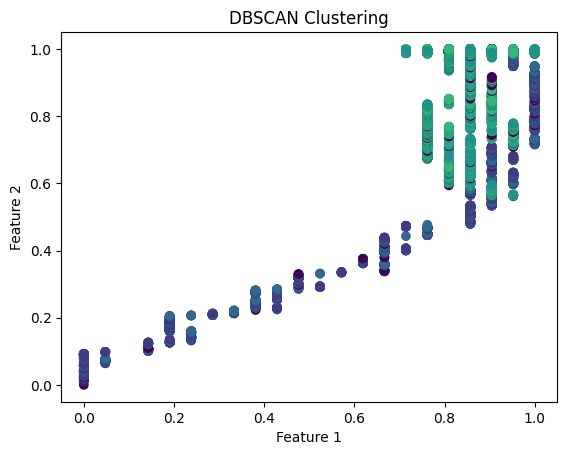

         X..commit  X..memused  X..swpcad  X..swpused   
cluster                                                 
-1       27.528402   98.477727  33.237351    0.657628  \
 0       27.500045   96.121442  16.895434    0.300000   
 1       27.499070   96.103025  16.895391    0.300000   
 2       27.540162   99.236563  37.589834    0.766935   
 3       27.539979   99.251033  37.539357    0.767505   
 4       27.560000   99.613333  51.863333    0.760000   
 5       27.560000   99.598571  51.857143    0.760000   

         X.dev.mapper.cloud..2.root_.fsused   
cluster                                       
-1                                52.411200  \
 0                                52.296831   
 1                                52.295514   
 2                                52.455258   
 3                                52.457454   
 4                                52.585000   
 5                                52.582857   

         X.dev.mapper.cloud..2.root_.ufsused  all_..idle  all_

In [6]:
# Визуализация результатов (для двумерных данных)
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=data['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Вывод информации о кластерах
cluster_info = data.groupby('cluster').mean()
print(cluster_info)


***ОЦЕНКА ВАЖНОСТИ ПРИЗНАКОВ***

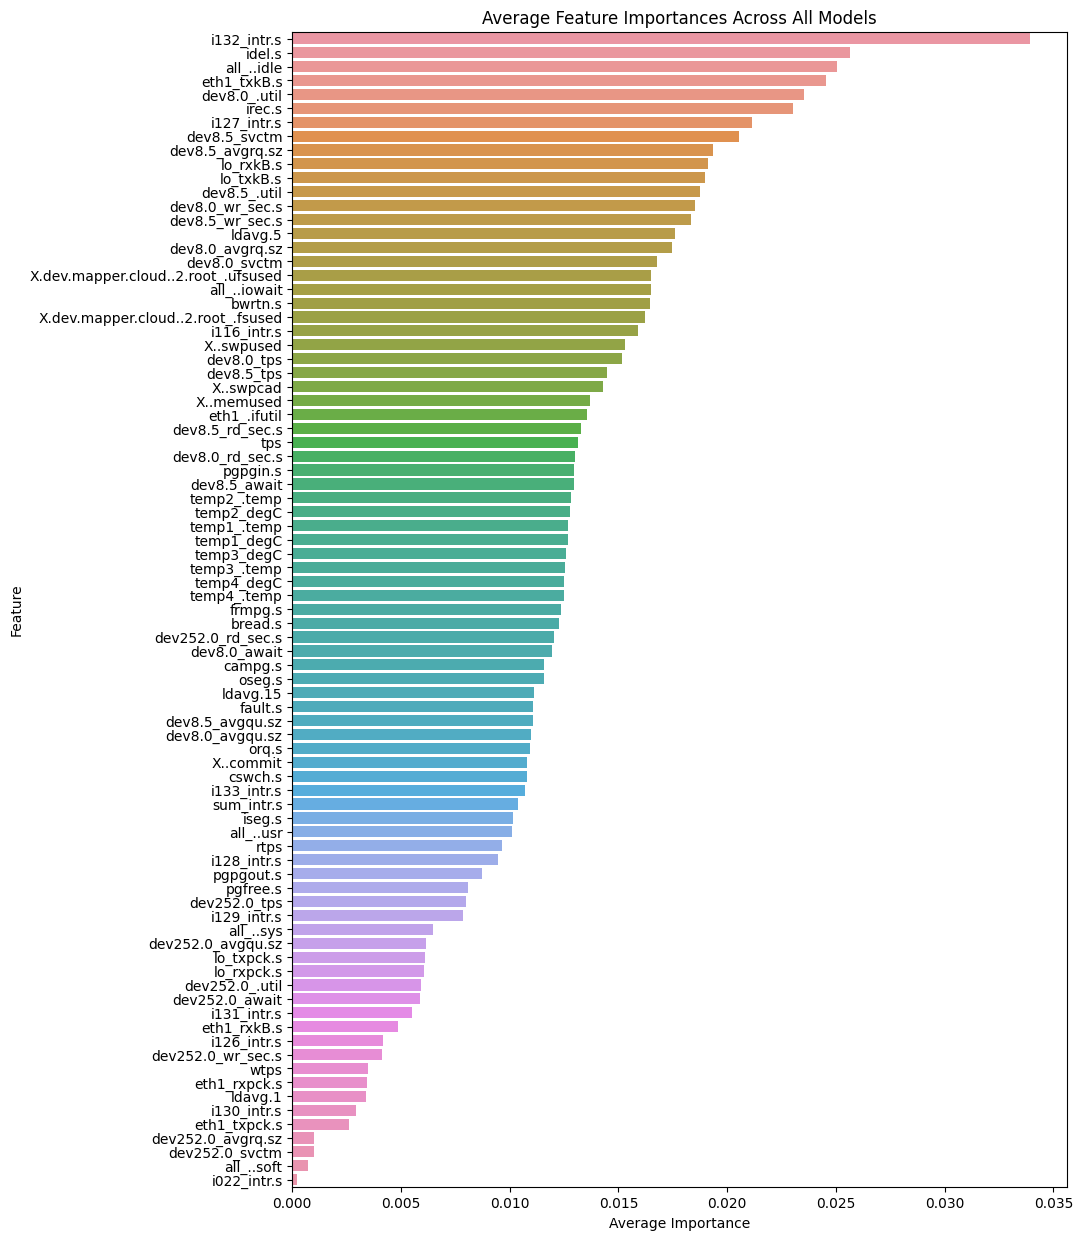

In [6]:
import os
from joblib import load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = list(data.columns)

# Словарь для хранения важности признаков из всех моделей
all_feature_importances = {feature: [] for feature in feature_names}

# Перебор всех файлов моделей в директории
# joblib.dump(regressor, f'model_{column}.joblib')
for column in feature_names:
    model = load(f'model_{column}.joblib')
    feature_importances = model.feature_importances_

    # Сохранение важности признаков
    feat = feature_names.copy()
    feat.remove(column)
    importance_df = pd.DataFrame({'Feature': feat, 'Importance': feature_importances})
    importance_df.to_csv(f'{column}_importance.csv', index=False)

    # Добавление важности в общий словарь
    for feature, importance in zip(feat, feature_importances):
        all_feature_importances[feature].append(importance)

    # Визуализация и сохранение графика
    plt.figure(figsize=(10, 15))
    sns.barplot(data=importance_df, y='Feature', x='Importance')
    plt.title(f'Feature Importances for {column}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.savefig(f'{column}_importance.png')
    plt.close()

# Анализ общей важности признаков
aggregate_importances = {feature: sum(importances)/len(importances) for feature, importances in all_feature_importances.items()}
aggregate_importance_df = pd.DataFrame(list(aggregate_importances.items()), columns=['Feature', 'Average Importance'])
aggregate_importance_df.sort_values(by='Average Importance', ascending=False, inplace=True)

# Сохранение и визуализация общей важности
aggregate_importance_df.to_csv('aggregate_importance.csv', index=False)
plt.figure(figsize=(10, 15))
sns.barplot(data=aggregate_importance_df, y='Feature', x='Average Importance')
plt.title('Average Feature Importances Across All Models')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.savefig('aggregate_importance.png')


In [9]:
import os
import pandas as pd

feature_names = list(data.columns)
feature_counts = {}

# Проход по всем файлам в директории
for column in feature_names:
    df = pd.read_csv(f'{column}_importance.csv')

    # Подсчет признаков с важностью выше 0.5
    for index, row in df.iterrows():
        if row['Importance'] > 0.5:
            feature = row['Feature']
            feature_counts[feature] = feature_counts.get(feature, 0) + 1

# Создание DataFrame из полученных данных
feature_importance_counts = pd.DataFrame(list(feature_counts.items()), columns=['Feature', 'Count'])
feature_importance_counts.sort_values(by='Count', ascending=False, inplace=True)

# Вывод результатов
print(feature_importance_counts.to_string(index=False))


                            Feature  Count
                        i132_intr.s      2
                             idel.s      2
                        eth1_txkB.s      2
                            ldavg.5      2
                       dev8.5_.util      2
                    dev8.5_avgrq.sz      2
                       dev8.5_svctm      2
                        i133_intr.s      1
                             irec.s      1
                           ldavg.15      1
                          lo_txkB.s      1
                          lo_rxkB.s      1
                             iseg.s      1
                         temp1_degC      1
                            cswch.s      1
                        i127_intr.s      1
                        temp1_.temp      1
                         temp2_degC      1
                        temp2_.temp      1
                         temp3_degC      1
                        temp3_.temp      1
                         temp4_degC      1
           

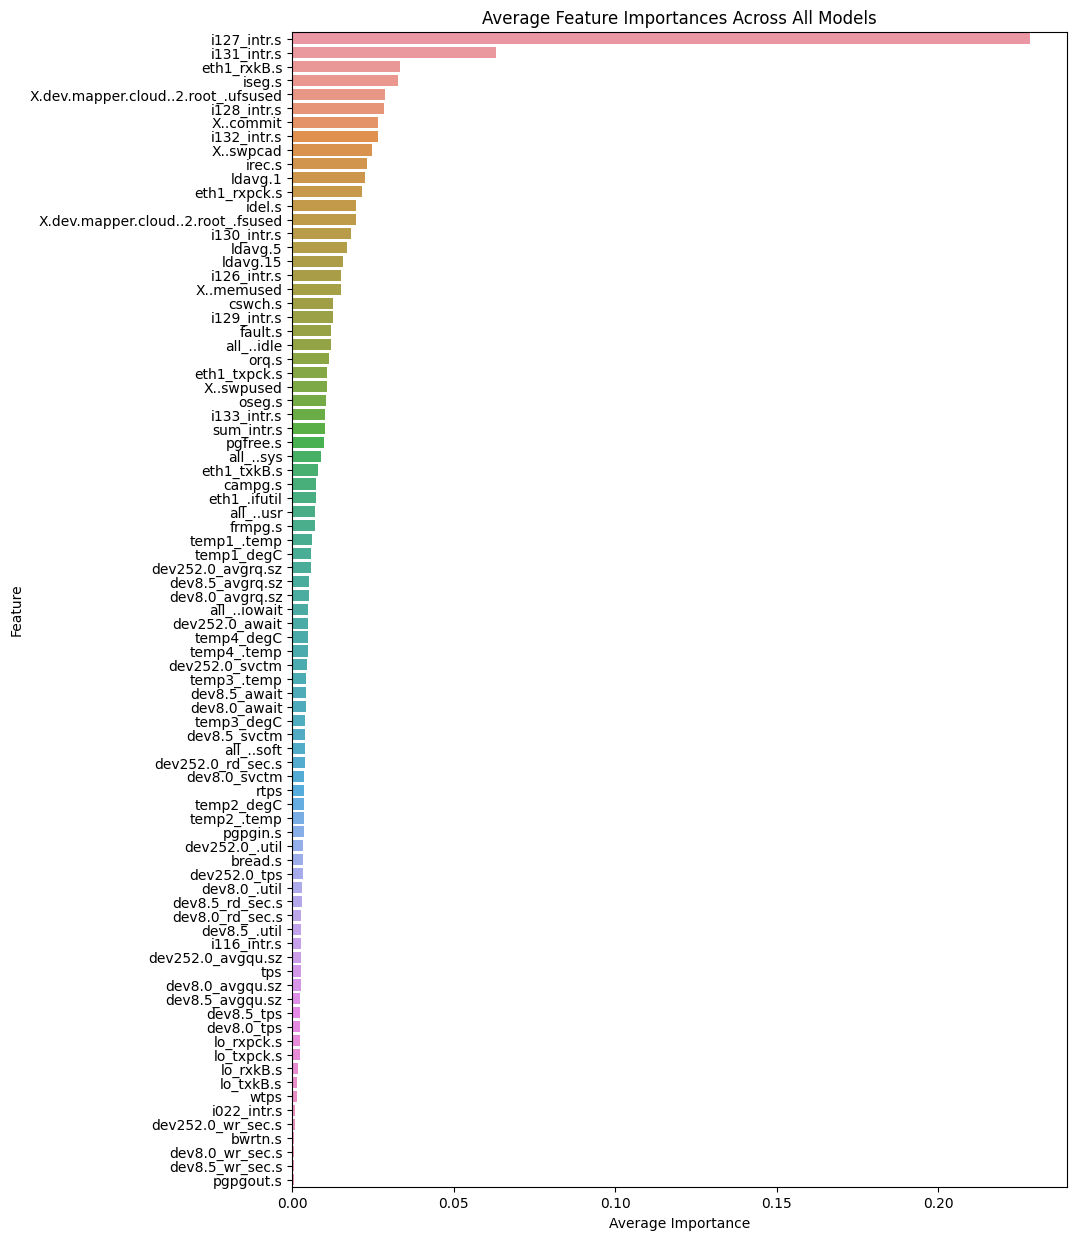

In [5]:
import os
from joblib import load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = list(data.columns)

# Словарь для хранения важности признаков из всех моделей
all_feature_importances = {feature: [] for feature in feature_names}

# Перебор всех файлов моделей в директории
# joblib.dump(regressor, f'model_{column}.joblib')
for column in Y_data.columns:
    model = load(f'model_{column}.joblib')
    feature_importances = model.feature_importances_

    # Сохранение важности признаков
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df.to_csv(f'{column}_importance.csv', index=False)

    # Добавление важности в общий словарь
    for feature, importance in zip(feature_names, feature_importances):
        all_feature_importances[feature].append(importance)

    # Визуализация и сохранение графика
    plt.figure(figsize=(10, 15))
    sns.barplot(data=importance_df, y='Feature', x='Importance')
    plt.title(f'Feature Importances for {column}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.savefig(f'{column}_importance.png')
    plt.close()

# Анализ общей важности признаков
aggregate_importances = {feature: sum(importances)/len(importances) for feature, importances in all_feature_importances.items()}
aggregate_importance_df = pd.DataFrame(list(aggregate_importances.items()), columns=['Feature', 'Average Importance'])
aggregate_importance_df.sort_values(by='Average Importance', ascending=False, inplace=True)

# Сохранение и визуализация общей важности
aggregate_importance_df.to_csv('aggregate_importance.csv', index=False)
plt.figure(figsize=(10, 15))
sns.barplot(data=aggregate_importance_df, y='Feature', x='Average Importance')
plt.title('Average Feature Importances Across All Models')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.savefig('aggregate_importance.png')


***Объяснённая дисперсия, PCA и тд***

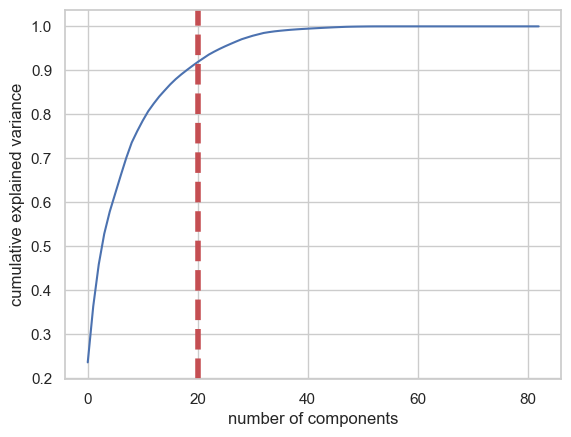

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.235686,0.235686
1,0.363331,0.127645
2,0.458397,0.095066
3,0.528210,0.069812
4,0.578597,0.050387
5,0.619912,0.041316
6,0.660910,0.040997
7,0.700595,0.039686
8,0.735808,0.035212
9,0.761700,0.025893


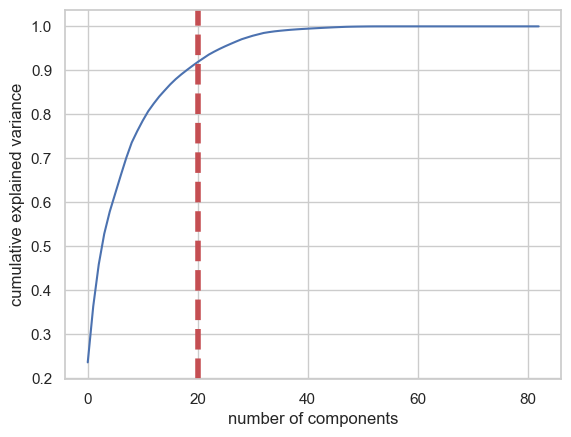

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.235686,0.235686
1,0.363331,0.127645
2,0.458397,0.095066
3,0.528210,0.069812
4,0.578597,0.050387
5,0.619912,0.041316
6,0.660910,0.040997
7,0.700595,0.039686
8,0.735808,0.035212
9,0.761700,0.025893


'\n    # Инициализируем модель\n    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)\n\n    # Обучаем модель\n    regressor.fit(X_train, y_train)\n    Y_models_dict[column] = regressor\n    joblib.dump(regressor, f\'model_{column}.joblib\')\n\n    # Делаем прогноз на тестовом наборе\n    y_pred = regressor.predict(X_test)\n\n    # Вычисляем метрики и сохраняем их в словарь\n    Y_metrics_dict[column] = {\n        \'Mean Absolute Error\': metrics.mean_absolute_error(y_test, y_pred),\n        \'Mean Squared Error\': metrics.mean_squared_error(y_test, y_pred),\n        \'Root Mean Squared Error\': np.sqrt(metrics.mean_squared_error(y_test, y_pred))\n    }\n    print(column)\n\n# Выводим метрики для каждого столбца\nfor column, metrics in Y_metrics_dict.items():\n    print(f\'Metrics for column "{column}":\')\n    for metric_name, metric_value in metrics.items():\n        print(f\'{metric_name}: {metric_value}\')\n    print(\'\n\')'

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca_test = PCA(n_components=83)
    pca_test.fit(X_train_scaled)
    sns.set(style='whitegrid')
    plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.axvline(linewidth=4, color='r', linestyle = '--', x=20, ymin=0, ymax=1)
    display(plt.show())
    evr = pca_test.explained_variance_ratio_
    cvr = np.cumsum(pca_test.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Cumulative Variance Ratio'] = cvr
    pca_df['Explained Variance Ratio'] = evr
    display(pca_df.head(20))
    

'''
    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')'''


ReadsAvg


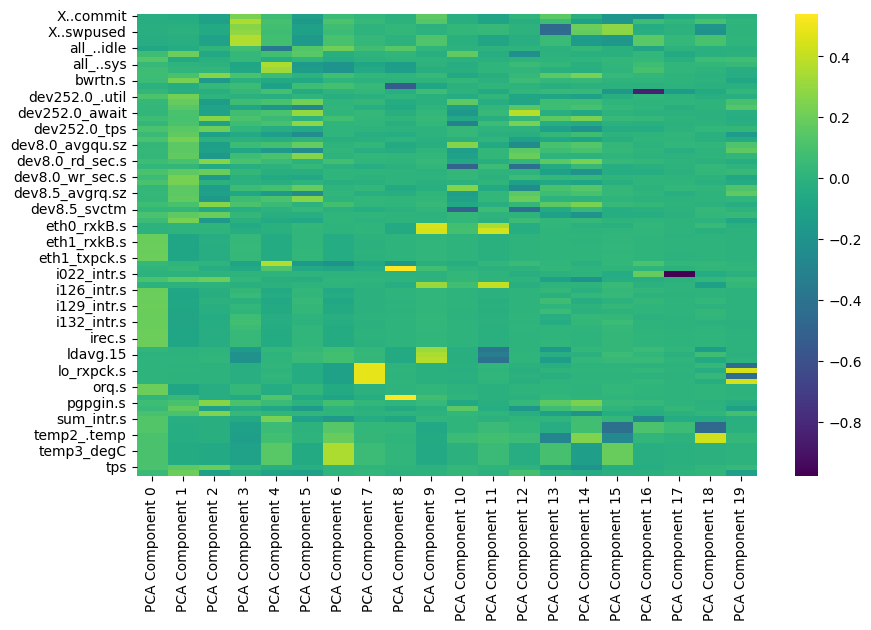

ReadsAvg
WritesAvg


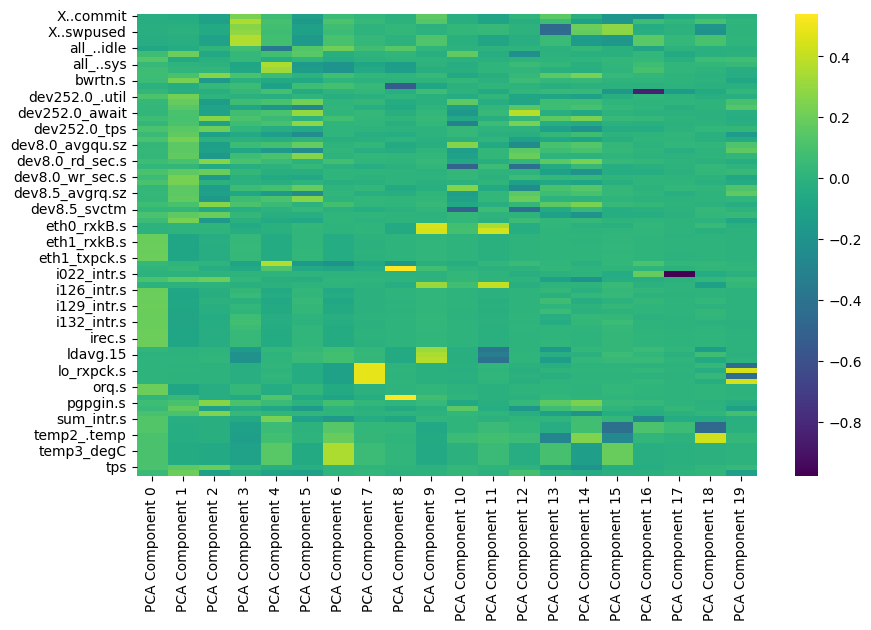

WritesAvg
Metrics for column "ReadsAvg":
Mean Absolute Error: 1.093377933887557
Mean Squared Error: 3.6918782100275984
Root Mean Squared Error: 1.921426087578598


Metrics for column "WritesAvg":
Mean Absolute Error: 2.3811907037538638
Mean Squared Error: 35.70257858343549
Root Mean Squared Error: 5.975163477549002




In [10]:
# Создаем пустой словарь для хранения метрик для каждого столбца
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    print(column)
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    evr = pca.explained_variance_ratio_
    cvr = np.cumsum(pca.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Cumulative Variance Ratio'] = cvr
    pca_df['Explained Variance Ratio'] = evr
    
    
    pca_dims = []
    for x in range(len(pca_df)):
        pca_dims.append('PCA Component {}'.format(x))
    pca_df = pd.DataFrame(pca.components_, columns=data.columns, index=pca_dims)
    #print(pca_test_df.head(10).T)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pca_df.T, cmap='viridis')
    plt.show()

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train_scaled_pca, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'pca_model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test_scaled_pca)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


In [6]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Определение диапазона гиперпараметров для RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(5, 15)),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    'bootstrap': [True, False]
}

# Инициализация переменных для хранения результатов
best_params_dict = {}

# Итерация по столбцам в Y_data
for column in Y_data.columns:
    print(f"Обработка столбца {column}")

    # Подготовка данных
    X = data
    y = Y_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)

    # RandomizedSearchCV
    rfc = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=rfc, 
        param_distributions=param_dist, 
        n_iter=100, 
        cv=3, 
        verbose=2, 
        n_jobs=-1, 
        random_state=42
    )
    random_search.fit(X_train_scaled_pca, y_train)

    # Сохранение лучших параметров
    best_params = random_search.best_params_
    best_params_dict[column] = best_params
    print(f"Лучшие параметры для {column}: {best_params}")

Обработка столбца ReadsAvg
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры для ReadsAvg: {'n_estimators': 500, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Обработка столбца WritesAvg
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры для WritesAvg: {'n_estimators': 500, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [9]:
from sklearn.model_selection import GridSearchCV

# Уточненный диапазон параметров для GridSearchCV
param_grid = {
    'n_estimators': [400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600],
    'max_features': ['log2'],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [10, 11, 12, 13, 14, 15, 16],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'bootstrap': [False]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

# Применение GridSearchCV для каждого столбца в Y_data
for column in Y_data.columns:
    print(f"Обработка столбца {column}")

    # Подготовка данных
    X = data
    y = Y_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)

    # Обучение GridSearchCV
    grid_search.fit(X_train_scaled_pca, y_train)

    # Получение и вывод лучших параметров
    best_params = grid_search.best_params_
    print(f"Лучшие параметры для {column}: {best_params}")


Обработка столбца ReadsAvg
Fitting 3 folds for each of 1540 candidates, totalling 4620 fits
Лучшие параметры для ReadsAvg: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 460}
Обработка столбца WritesAvg
Fitting 3 folds for each of 1540 candidates, totalling 4620 fits
Лучшие параметры для WritesAvg: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 580}


In [11]:
from sklearn.model_selection import GridSearchCV

# Уточненный диапазон параметров для GridSearchCV
param_grid = {
    'n_estimators': [450, 455, 460, 465, 470, 570, 575, 580, 585, 590],
    'max_features': ['log2'],
    'max_depth': [None, 20],
    'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12],
    'min_samples_leaf': [2, 3, 4, 5],
    'bootstrap': [False]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_grid=param_grid, 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

# Применение GridSearchCV для каждого столбца в Y_data
for column in Y_data.columns:
    print(f"Обработка столбца {column}")

    # Подготовка данных
    X = data
    y = Y_data[column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)

    # Обучение GridSearchCV
    grid_search.fit(X_train_scaled_pca, y_train)

    # Получение и вывод лучших параметров
    best_params = grid_search.best_params_
    print(f"Лучшие параметры для {column}: {best_params}")


Обработка столбца ReadsAvg
Fitting 3 folds for each of 640 candidates, totalling 1920 fits
Лучшие параметры для ReadsAvg: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 470}
Обработка столбца WritesAvg
Fitting 3 folds for each of 640 candidates, totalling 1920 fits
Лучшие параметры для WritesAvg: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 455}


In [6]:
import numpy as np
import pandas as pd

def create_missing_data(dataframe, missing_percentage=0.1, distribution='uniform'):
    """
    Создает пропуски в данных заданного датафрейма.
    
    Параметры:
    - dataframe (pd.DataFrame): Исходный датафрейм.
    - missing_percentage (float): Процент пропусков, который нужно создать.
    - distribution (str): Распределение пропусков. 'uniform' для равномерного распределения,
                           'random' для случайного распределения с разной вероятностью по столбцам.
    
    Возвращает:
    - pd.DataFrame: Датафрейм с созданными пропусками.
    """
    df_missing = dataframe.copy()
    n_rows, n_cols = df_missing.shape
    
    n_missing = int(n_rows * n_cols * missing_percentage)
    
    if distribution == 'uniform':
        missing_indices = np.random.choice(n_rows * n_cols, n_missing, replace=False)
        for idx in missing_indices:
            row, col = divmod(idx, n_cols)
            df_missing.iat[row, col] = np.nan
    elif distribution == 'random':
        for col in df_missing.columns:
            n_missing_col = int(n_rows * missing_percentage * np.random.rand())
            missing_indices = np.random.choice(n_rows, n_missing_col, replace=False)
            df_missing.iloc[missing_indices, df_missing.columns.get_loc(col)] = np.nan
    
    return df_missing

# Пример использования функции
df_example = pd.DataFrame({
    'A': range(1, 11),
    'B': range(11, 21),
    'C': range(21, 31),
})

df_missing = create_missing_data(df_example, missing_percentage=0.2, distribution='uniform')
df_missing


,A,B,C
0,1.0,NaN,NaN
1,2.0,NaN,22.0
2,3.0,NaN,23.0
3,NaN,14.0,24.0
4,5.0,15.0,25.0
5,6.0,16.0,26.0
6,7.0,17.0,NaN
7,8.0,18.0,28.0
8,9.0,19.0,29.0
9,10.0,20.0,30.0


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}
scalers_dict = {}
pcas_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    print(column)
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)
    # Выбираем текущий столбец как целевую переменную
    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
     # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scalers_dict[column] = scaler
    joblib.dump(scaler, f'scaler_{column}.joblib')

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    pcas_dict[column] = pca
    joblib.dump(pca, f'pca_{column}.joblib')

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)

    # Обучаем модель
    regressor.fit(X_train_scaled_pca, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_hyper_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test_scaled_pca)
    regressor.fit(X_train, y_train)

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


ReadsAvg
WritesAvg
Metrics for column "ReadsAvg":
Mean Absolute Error: 1.009284458866391
Mean Squared Error: 2.2322349676293833
Root Mean Squared Error: 1.4940665874148258


Metrics for column "WritesAvg":
Mean Absolute Error: 2.1994510345800986
Mean Squared Error: 12.233655980261483
Root Mean Squared Error: 3.4976643607215205




In [37]:
#shifted
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}
scalers_dict = {}
pcas_dict = {}

# Сдвигаем Y_data на одну строку вверх и удаляем последнюю строку из data
Y_data_shifted = Y_data.shift(-2).iloc[:-2]
data_adjusted = data.iloc[:-2]

# Итерируемся по всем столбцам сдвинутого Y_data
for column in Y_data_shifted.columns:
    print(column)
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)
    # Выбираем текущий столбец как целевую переменную
    X = data_adjusted
    y = Y_data_shifted[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Стандартизация и PCA
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scalers_dict[column] = scaler
    joblib.dump(scaler, f'scaler_shifted_{column}.joblib')

    pca = PCA(n_components=20)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    pcas_dict[column] = pca
    joblib.dump(pca, f'pca_shifted_{column}.joblib')

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)

    # Обучаем модель
    regressor.fit(X_train_scaled_pca, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_hyper_shifted_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test_scaled_pca)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


ReadsAvg
WritesAvg
Metrics for column "ReadsAvg":
Mean Absolute Error: 2.8447766468349585
Mean Squared Error: 44.58877136290016
Root Mean Squared Error: 6.677482412024772


Metrics for column "WritesAvg":
Mean Absolute Error: 5.394982475546456
Mean Squared Error: 137.48863836768408
Root Mean Squared Error: 11.725554927920642




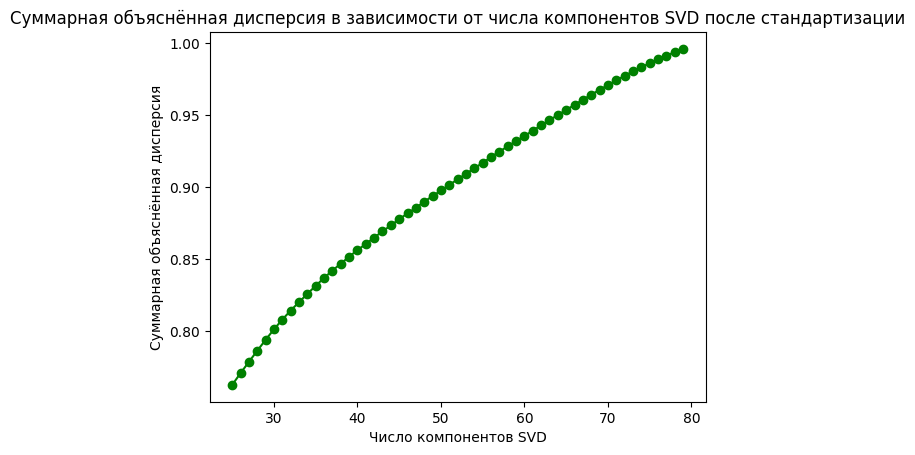

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

data_missing = create_missing_data(data, missing_percentage=0.3, distribution='uniform')

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_missing)

# Стандартизация данных перед применением SVD
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Список для хранения ошибок восстановления для SVD после стандартизации
# Подготовка списка для хранения объяснённой дисперсии для SVD
explained_variance_ratio_svd = []

for n_components in range(25, 80):
    svd = TruncatedSVD(n_components=n_components, random_state=0)
    svd.fit(data_scaled)  # Обучение SVD на стандартизированных данных
    explained_variance_ratio_svd.append(svd.explained_variance_ratio_.sum())  # Суммарная объяснённая дисперсия
    
    #print(f"SVD после стандартизации - Количество компонент: {n_components}, Суммарная объяснённая дисперсия: {svd.explained_variance_ratio_.sum()}")

# Визуализация суммарной объяснённой дисперсии для SVD после стандартизации
plt.figure()
plt.plot(range(25, 80), explained_variance_ratio_svd, marker='o', color='g')
plt.xlabel('Число компонентов SVD')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.title('Суммарная объяснённая дисперсия в зависимости от числа компонентов SVD после стандартизации')
plt.show()
# 46 компонент объясняют более 80% дисперсии, если strategy='constant', fill=0
# 30 компонент при mean

In [27]:
# пропуски и в обучающей, и в тестовой
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.decomposition import NMF

combinations = [
    (0.1, 'uniform'),
    (0.2, 'uniform'),
    (0.3, 'uniform'),
    (0.4, 'uniform'),
    (0.5, 'uniform'),
    (0.1, 'random'),
    (0.2, 'random'),
    (0.3, 'random'),
    (0.4, 'random'),
    (0.5, 'random'),
]

for column in Y_data.columns:
    print(column)
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)
    # Выбираем текущий столбец как целевую переменную
    y = Y_data[column]
    # Цикл по комбинациям пропусков
    for missing_percentage, distribution in combinations:
        # Создание пропусков в данных
        data_missing = create_missing_data(data, missing_percentage=missing_percentage, distribution=distribution)

        # Разделение на обучающую и тестовую выборки
        X_train, X_test, Y_train, Y_test = train_test_split(data_missing, y, test_size=0.3, random_state=0)
        Y_train_missing = create_missing_data(Y_train.to_frame(), missing_percentage=missing_percentage, distribution=distribution)

        # Заполнение пропусков с помощью импьютации
        imputer_X = SimpleImputer(strategy='mean')
        X_train_imputed = imputer_X.fit_transform(X_train)
        X_test_imputed = imputer_X.transform(X_test)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_imputed)
        X_test_scaled = scaler.transform(X_test_imputed)

        imputer_Y = SimpleImputer(strategy='mean')
        Y_train_imputed = imputer_Y.fit_transform(Y_train_missing)
        Y_train_imputed = Y_train_imputed.squeeze()

        # Применение SVD
        svd = TruncatedSVD(n_components=30, random_state=0)
        X_train_svd = svd.fit_transform(X_train_scaled)
        X_test_svd = svd.transform(X_test_scaled)

        # Обучение и оценка модели случайного леса
        regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)
        regressor.fit(X_train_svd, Y_train_imputed.ravel())  
        Y_pred = regressor.predict(X_test_svd)

        # Расчет и вывод MSE и RMSE
        mse = mean_squared_error(Y_test, Y_pred)
        rmse = np.sqrt(mse)

        print(f"SVD - Процент пропусков: {missing_percentage}, Распределение: {distribution}")
        print(f"MSE: {mse}, RMSE: {rmse}")


ReadsAvg
SVD - Процент пропусков: 0.1, Распределение: uniform
MSE: 54.351215174978044, RMSE: 7.372327663294548
SVD - Процент пропусков: 0.2, Распределение: uniform
MSE: 56.295827596192915, RMSE: 7.503054551060716
SVD - Процент пропусков: 0.3, Распределение: uniform
MSE: 58.51048457423793, RMSE: 7.649214637741442
SVD - Процент пропусков: 0.4, Распределение: uniform
MSE: 61.102815045467445, RMSE: 7.816828963554687
SVD - Процент пропусков: 0.5, Распределение: uniform
MSE: 63.79205448816087, RMSE: 7.986992831357799
SVD - Процент пропусков: 0.1, Распределение: random
MSE: 52.36107646937359, RMSE: 7.236095388355076
SVD - Процент пропусков: 0.2, Распределение: random
MSE: 53.573247209967676, RMSE: 7.319374782723431
SVD - Процент пропусков: 0.3, Распределение: random
MSE: 56.8852015100253, RMSE: 7.542227887701704
SVD - Процент пропусков: 0.4, Распределение: random
MSE: 55.08880379481151, RMSE: 7.422183222934577
SVD - Процент пропусков: 0.5, Распределение: random
MSE: 57.773599383616286, RMSE: 

In [29]:
# заполнение средними
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.decomposition import NMF

combinations = [
    (0.1, 'uniform'),
    (0.2, 'uniform'),
    (0.3, 'uniform'),
    (0.4, 'uniform'),
    (0.5, 'uniform'),
    (0.1, 'random'),
    (0.2, 'random'),
    (0.3, 'random'),
    (0.4, 'random'),
    (0.5, 'random'),
]

for column in Y_data.columns:
    print(column)
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)
    # Выбираем текущий столбец как целевую переменную
    y = Y_data[column]
    # Цикл по комбинациям пропусков
    for missing_percentage, distribution in combinations:
        # Создание пропусков в данных
        data_missing = create_missing_data(data, missing_percentage=missing_percentage, distribution=distribution)

        # Разделение на обучающую и тестовую выборки
        X_train, X_test, Y_train, Y_test = train_test_split(data_missing, y, test_size=0.3, random_state=0)
        Y_train_missing = create_missing_data(Y_train.to_frame(), missing_percentage=missing_percentage, distribution=distribution)

        # Заполнение пропусков с помощью импьютации
        imputer_X = SimpleImputer(strategy='mean')
        X_train_imputed = imputer_X.fit_transform(X_train)
        X_test_imputed = imputer_X.transform(X_test)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_imputed)
        X_test_scaled = scaler.transform(X_test_imputed)

        imputer_Y = SimpleImputer(strategy='mean')
        Y_train_imputed = imputer_Y.fit_transform(Y_train_missing)
        Y_train_imputed = Y_train_imputed.squeeze()

        # Обучение и оценка модели случайного леса
        regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)
        regressor.fit(X_train_scaled, Y_train_imputed.ravel())  
        Y_pred = regressor.predict(X_test_scaled)

        # Расчет и вывод MSE и RMSE
        mse = mean_squared_error(Y_test, Y_pred)
        rmse = np.sqrt(mse)

        print(f"SVD - Процент пропусков: {missing_percentage}, Распределение: {distribution}")
        print(f"MSE: {mse}, RMSE: {rmse}")


ReadsAvg
SVD - Процент пропусков: 0.1, Распределение: uniform
MSE: 48.02076920085297, RMSE: 6.929701956134402
SVD - Процент пропусков: 0.2, Распределение: uniform
MSE: 52.41398138961818, RMSE: 7.239750091654972
SVD - Процент пропусков: 0.3, Распределение: uniform
MSE: 56.40879722845536, RMSE: 7.510579020851545
SVD - Процент пропусков: 0.4, Распределение: uniform
MSE: 58.87056927647543, RMSE: 7.672715899632634
SVD - Процент пропусков: 0.5, Распределение: uniform
MSE: 61.831517380068036, RMSE: 7.8633019387575365
SVD - Процент пропусков: 0.1, Распределение: random
MSE: 44.32878178513879, RMSE: 6.6579863160822725
SVD - Процент пропусков: 0.2, Распределение: random
MSE: 46.15124999869292, RMSE: 6.793471130334839
SVD - Процент пропусков: 0.3, Распределение: random
MSE: 50.791801091268646, RMSE: 7.126836681955652
SVD - Процент пропусков: 0.4, Распределение: random
MSE: 48.840596764968055, RMSE: 6.988604779565665
SVD - Процент пропусков: 0.5, Распределение: random
MSE: 53.69067230858766, RMSE:

In [12]:
# заполнение нулями
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.decomposition import NMF

combinations = [
    (0.1, 'uniform'),
    (0.2, 'uniform'),
    (0.3, 'uniform'),
    (0.4, 'uniform'),
    (0.5, 'uniform'),
    (0.1, 'random'),
    (0.2, 'random'),
    (0.3, 'random'),
    (0.4, 'random'),
    (0.5, 'random'),
]

for column in Y_data.columns:
    print(column)
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)
    # Выбираем текущий столбец как целевую переменную
    y = Y_data[column]
    # Цикл по комбинациям пропусков
    for missing_percentage, distribution in combinations:
        # Создание пропусков в данных
        data_missing = create_missing_data(data, missing_percentage=missing_percentage, distribution=distribution)

        # Разделение на обучающую и тестовую выборки
        X_train, X_test, Y_train, Y_test = train_test_split(data_missing, y, test_size=0.3, random_state=0)
        Y_train_missing = create_missing_data(Y_train.to_frame(), missing_percentage=missing_percentage, distribution=distribution)

        # Заполнение пропусков с помощью импьютации
        imputer_X = SimpleImputer(strategy='constant', fill_value=0)
        X_train_imputed = imputer_X.fit_transform(X_train)
        X_test_imputed = imputer_X.transform(X_test)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_imputed)
        X_test_scaled = scaler.transform(X_test_imputed)

        imputer_Y = SimpleImputer(strategy='constant', fill_value=0)
        Y_train_imputed = imputer_Y.fit_transform(Y_train_missing)
        Y_train_imputed = Y_train_imputed.squeeze()

        # Обучение и оценка модели случайного леса
        regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)
        regressor.fit(X_train_scaled, Y_train_imputed.ravel())  
        Y_pred = regressor.predict(X_test_scaled)

        # Расчет и вывод MSE и RMSE
        mse = mean_squared_error(Y_test, Y_pred)
        rmse = np.sqrt(mse)

        print(f"SVD - Процент пропусков: {missing_percentage}, Распределение: {distribution}")
        print(f"MSE: {mse}, RMSE: {rmse}")


ReadsAvg
SVD - Процент пропусков: 0.1, Распределение: uniform
MSE: 91.32921260218146, RMSE: 9.556631864950196
SVD - Процент пропусков: 0.2, Распределение: uniform
MSE: 201.47472561427458, RMSE: 14.194179286393227
SVD - Процент пропусков: 0.3, Распределение: uniform
MSE: 369.2108173031509, RMSE: 19.214859283979962
SVD - Процент пропусков: 0.4, Распределение: uniform
MSE: 596.2777158453997, RMSE: 24.418798411170844
SVD - Процент пропусков: 0.5, Распределение: uniform
MSE: 870.7150547493443, RMSE: 29.507881231110854
SVD - Процент пропусков: 0.1, Распределение: random
MSE: 88.47236402333562, RMSE: 9.405974910839154
SVD - Процент пропусков: 0.2, Распределение: random
MSE: 72.87895851367419, RMSE: 8.53691738941371
SVD - Процент пропусков: 0.3, Распределение: random
MSE: 253.5969588320801, RMSE: 15.924727904491181
SVD - Процент пропусков: 0.4, Распределение: random
MSE: 57.729061097068225, RMSE: 7.597964273216098
SVD - Процент пропусков: 0.5, Распределение: random
MSE: 708.2683183342938, RMSE

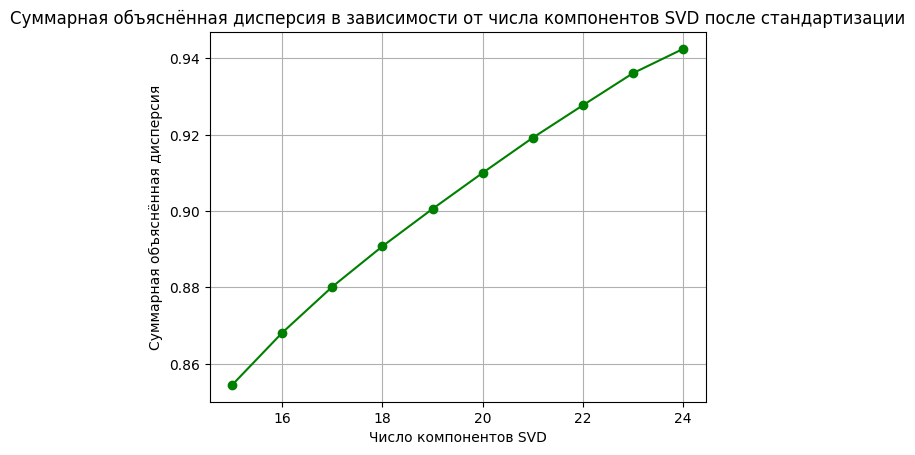

In [18]:
# без пропусков в данных
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Стандартизация данных перед применением SVD
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Список для хранения ошибок восстановления для SVD после стандартизации
# Подготовка списка для хранения объяснённой дисперсии для SVD
explained_variance_ratio_svd = []

for n_components in range(15, 25):
    svd = TruncatedSVD(n_components=n_components, random_state=0)
    svd.fit(data_scaled)  # Обучение SVD на стандартизированных данных
    explained_variance_ratio_svd.append(svd.explained_variance_ratio_.sum())  # Суммарная объяснённая дисперсия
    
    #print(f"SVD после стандартизации - Количество компонент: {n_components}, Суммарная объяснённая дисперсия: {svd.explained_variance_ratio_.sum()}")

# Визуализация суммарной объяснённой дисперсии для SVD после стандартизации
plt.figure()
plt.plot(range(15, 25), explained_variance_ratio_svd, marker='o', color='g')
plt.xlabel('Число компонентов SVD')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.title('Суммарная объяснённая дисперсия в зависимости от числа компонентов SVD после стандартизации')
plt.grid(True)
plt.show()
# 19 компонент

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}
scalers_dict = {}
svds_dict = {}  # Словарь для хранения SVD моделей

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    print(column)
    # Установка параметров модели в зависимости от целевой переменной
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)

    X = data
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Стандартизация данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scalers_dict[column] = scaler
    joblib.dump(scaler, f'scaler_{column}.joblib')

    # Применение SVD
    svd = TruncatedSVD(n_components=19)
    svd.fit(X_train_scaled)
    X_train_scaled_svd = svd.transform(X_train_scaled)
    X_test_scaled_svd = svd.transform(X_test_scaled)
    svds_dict[column] = svd
    joblib.dump(svd, f'svd_{column}.joblib')

    # Инициализируем и обучаем модель RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)
    regressor.fit(X_train_scaled_svd, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_hyper_{column}.joblib')

    # Делаем прогноз на тестовом наборе с использованием преобразованных через SVD данных
    y_pred = regressor.predict(X_test_scaled_svd)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


ReadsAvg
WritesAvg
Metrics for column "ReadsAvg":
Mean Absolute Error: 1.0601740636863395
Mean Squared Error: 2.507317805903154
Root Mean Squared Error: 1.5834512325623273


Metrics for column "WritesAvg":
Mean Absolute Error: 2.3089893401214012
Mean Squared Error: 15.945087134378689
Root Mean Squared Error: 3.9931299921713905




In [3]:
import pandas as pd

filenames = [f'2_{i}_X.csv' for i in range(6)]

df_combined = pd.DataFrame()

for i, filename in enumerate(filenames):
    df = pd.read_csv(filename, sep=';')
    df.rename(columns=lambda x: f'{x}_{i}', inplace=True)
    if df_combined.empty:
        df_combined = df
    else:
        df_combined = pd.concat([df_combined, df], axis=1)

df_combined.head()  # Печать первых нескольких строк для проверки


,X..commit_0,X..memused_0,X..swpcad_0,X..swpused_0,X..vmeff_0,X.dev.mapper.cloud..2.root_.Iused_0,X.dev.mapper.cloud..2.root_.fsused_0,X.dev.mapper.cloud..2.root_.ufsused_0,X.dev.sda1_.Iused_0,X.dev.sda1_.fsused_0,...,temp1_.temp_5,temp1_degC_5,temp2_.temp_5,temp2_degC_5,temp3_.temp_5,temp3_degC_5,temp4_.temp_5,temp4_degC_5,tps_5,wtps_5
0,27.31,92.74,19.33,0.33,0.0,2.17,52.1,57.19,0.25,38.91,...,32.14,22.5,32.14,22.5,30.71,21.5,30.71,21.5,17.0,3.0
1,27.31,92.75,19.33,0.33,0.0,2.17,52.1,57.19,0.25,38.91,...,32.14,22.5,32.14,22.5,30.71,21.5,30.71,21.5,15.0,0.0
2,27.31,92.76,19.33,0.33,0.0,2.17,52.1,57.19,0.25,38.91,...,32.14,22.5,32.14,22.5,30.71,21.5,30.71,21.5,30.0,0.0
3,27.31,92.77,19.33,0.33,0.0,2.17,52.1,57.19,0.25,38.91,...,32.14,22.5,32.14,22.5,30.71,21.5,30.71,21.5,46.0,19.0
4,27.31,92.75,19.34,0.33,0.0,2.17,52.1,57.19,0.25,38.91,...,32.14,22.5,32.14,22.5,30.71,21.5,30.71,21.5,24.0,0.0


In [4]:
threshold = 0.9

# Создание списка столбцов для удаления
columns_to_drop = []
total_rows = len(df_combined)
for column in df_combined.columns:
    value_counts = df_combined[column].value_counts(normalize=True)  # Подсчет относительной частоты значений
    if value_counts.iloc[0] > threshold:
        columns_to_drop.append(column)

# Удаление столбцов, в которых более 90% значений одинаковые
df_combined = df_combined.drop(columns=columns_to_drop)

# Вывод информации о удаленных столбцах
print(f"Удалены следующие столбцы: {', '.join(columns_to_drop)}")
df_combined

Удалены следующие столбцы: X..vmeff_0, X.dev.mapper.cloud..2.root_.Iused_0, X.dev.sda1_.Iused_0, X.dev.sda1_.fsused_0, X.dev.sda1_.ufsused_0, all_..irq_0, all_MHz_0, bufpg.s_0, cpu0_MHz_0, cpu10_.iowait_0, cpu10_.soft_0, cpu10_MHz_0, cpu11_.iowait_0, cpu11_.usr_0, cpu11_MHz_0, cpu12_.iowait_0, cpu12_.soft_0, cpu12_MHz_0, cpu13_.iowait_0, cpu13_MHz_0, cpu14_.iowait_0, cpu14_.soft_0, cpu14_MHz_0, cpu15_.iowait_0, cpu15_.soft_0, cpu15_MHz_0, cpu16_.iowait_0, cpu16_.soft_0, cpu16_MHz_0, cpu17_.iowait_0, cpu17_MHz_0, cpu18_.iowait_0, cpu18_.soft_0, cpu18_MHz_0, cpu19_.iowait_0, cpu19_MHz_0, cpu1_.iowait_0, cpu1_.soft_0, cpu1_.usr_0, cpu1_MHz_0, cpu20_.iowait_0, cpu20_.soft_0, cpu20_MHz_0, cpu21_MHz_0, cpu22_.iowait_0, cpu22_.soft_0, cpu22_MHz_0, cpu23_.iowait_0, cpu23_MHz_0, cpu2_MHz_0, cpu3_.iowait_0, cpu3_.soft_0, cpu3_.usr_0, cpu3_MHz_0, cpu4_.iowait_0, cpu4_.soft_0, cpu4_MHz_0, cpu5_.iowait_0, cpu5_.usr_0, cpu5_MHz_0, cpu6_.iowait_0, cpu6_.soft_0, cpu6_MHz_0, cpu7_.iowait_0, cpu7_.usr_0

,X..commit_0,X..memused_0,X..swpcad_0,X..swpused_0,X.dev.mapper.cloud..2.root_.fsused_0,X.dev.mapper.cloud..2.root_.ufsused_0,all_..idle_0,all_..iowait_0,all_..soft_0,all_..sys_0,...,temp1_.temp_5,temp1_degC_5,temp2_.temp_5,temp2_degC_5,temp3_.temp_5,temp3_degC_5,temp4_.temp_5,temp4_degC_5,tps_5,wtps_5
0,27.31,92.74,19.33,0.33,52.10,57.19,98.33,0.13,0.00,0.54,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,17.0,3.0
1,27.31,92.75,19.33,0.33,52.10,57.19,98.70,0.17,0.00,0.29,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,15.0,0.0
2,27.31,92.76,19.33,0.33,52.10,57.19,97.99,0.21,0.00,0.50,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,30.0,0.0
3,27.31,92.77,19.33,0.33,52.10,57.19,98.32,0.25,0.00,0.38,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,46.0,19.0
4,27.31,92.75,19.34,0.33,52.10,57.19,98.33,0.08,0.04,0.38,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19439,27.53,99.63,50.39,0.71,52.93,58.01,99.58,0.04,0.04,0.25,...,31.96,22.38,31.96,22.38,30.00,21.00,30.00,21.00,2.0,0.0
19440,27.53,99.63,50.39,0.71,52.93,58.01,99.67,0.00,0.00,0.25,...,32.32,22.62,32.32,22.62,30.00,21.00,30.00,21.00,0.0,0.0
19441,27.53,99.63,50.39,0.71,52.93,58.01,99.38,0.00,0.00,0.50,...,32.14,22.50,32.14,22.50,30.18,21.12,30.18,21.12,15.0,15.0
19442,27.53,99.54,57.81,0.87,52.93,58.01,99.58,0.04,0.00,0.25,...,31.43,22.00,31.43,22.00,30.18,21.12,30.18,21.12,0.0,0.0


In [5]:
columns_with_cpu = [col for col in df_combined.columns if 'cpu' in col]

# Удаление столбцов, содержащих 'cpu'
df_combined = df_combined.drop(columns=columns_with_cpu, axis=1)
df_combined

,X..commit_0,X..memused_0,X..swpcad_0,X..swpused_0,X.dev.mapper.cloud..2.root_.fsused_0,X.dev.mapper.cloud..2.root_.ufsused_0,all_..idle_0,all_..iowait_0,all_..soft_0,all_..sys_0,...,temp1_.temp_5,temp1_degC_5,temp2_.temp_5,temp2_degC_5,temp3_.temp_5,temp3_degC_5,temp4_.temp_5,temp4_degC_5,tps_5,wtps_5
0,27.31,92.74,19.33,0.33,52.10,57.19,98.33,0.13,0.00,0.54,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,17.0,3.0
1,27.31,92.75,19.33,0.33,52.10,57.19,98.70,0.17,0.00,0.29,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,15.0,0.0
2,27.31,92.76,19.33,0.33,52.10,57.19,97.99,0.21,0.00,0.50,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,30.0,0.0
3,27.31,92.77,19.33,0.33,52.10,57.19,98.32,0.25,0.00,0.38,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,46.0,19.0
4,27.31,92.75,19.34,0.33,52.10,57.19,98.33,0.08,0.04,0.38,...,32.14,22.50,32.14,22.50,30.71,21.50,30.71,21.50,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19439,27.53,99.63,50.39,0.71,52.93,58.01,99.58,0.04,0.04,0.25,...,31.96,22.38,31.96,22.38,30.00,21.00,30.00,21.00,2.0,0.0
19440,27.53,99.63,50.39,0.71,52.93,58.01,99.67,0.00,0.00,0.25,...,32.32,22.62,32.32,22.62,30.00,21.00,30.00,21.00,0.0,0.0
19441,27.53,99.63,50.39,0.71,52.93,58.01,99.38,0.00,0.00,0.50,...,32.14,22.50,32.14,22.50,30.18,21.12,30.18,21.12,15.0,15.0
19442,27.53,99.54,57.81,0.87,52.93,58.01,99.58,0.04,0.00,0.25,...,31.43,22.00,31.43,22.00,30.18,21.12,30.18,21.12,0.0,0.0


In [6]:
Y_data.describe()

,ReadsAvg,WritesAvg
count,19444.000000,19444.000000
mean,55.237301,110.521239
std,2.936726,6.948348
min,51.085600,101.703600
25%,53.302200,106.442950
50%,54.176500,108.376750
75%,56.849175,113.736325
max,152.085200,583.789500


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)
    # Выбираем текущий столбец как целевую переменную
    X = df_combined
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)

    # Обучаем модель
    regressor.fit(X_train, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'united_model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


ReadsAvg
WritesAvg
Metrics for column "ReadsAvg":
Mean Absolute Error: 0.988764435297624
Mean Squared Error: 2.1482662141268816
Root Mean Squared Error: 1.4656964945468354


Metrics for column "WritesAvg":
Mean Absolute Error: 2.1742390775606775
Mean Squared Error: 11.954032942416504
Root Mean Squared Error: 3.457460475900846




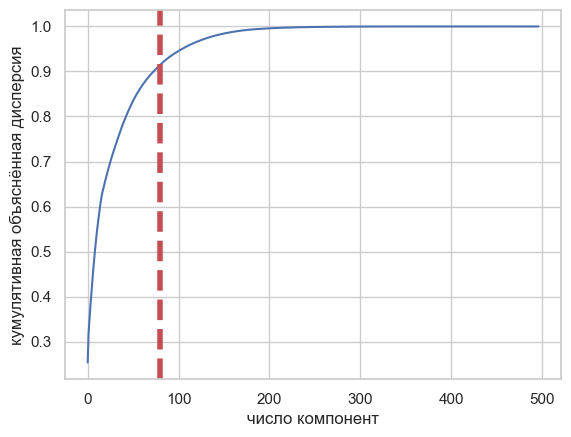

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.253713,0.253713
1,0.319130,0.065417
2,0.350084,0.030955
3,0.378130,0.028045
4,0.405114,0.026984
5,0.431655,0.026542
6,0.456615,0.024959
7,0.480279,0.023664
8,0.501988,0.021709
9,0.522412,0.020424


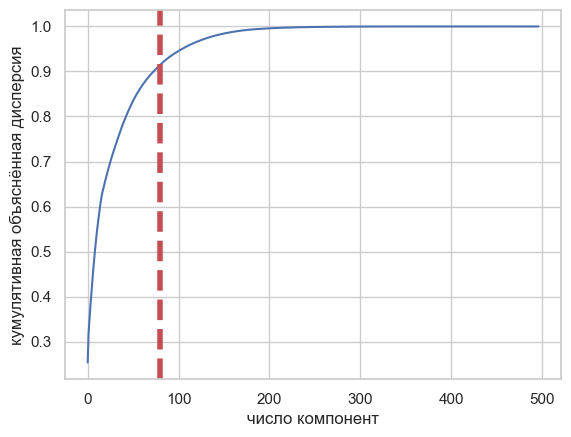

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.253713,0.253713
1,0.319130,0.065417
2,0.350084,0.030955
3,0.378130,0.028045
4,0.405114,0.026984
5,0.431655,0.026542
6,0.456615,0.024959
7,0.480279,0.023664
8,0.501988,0.021709
9,0.522412,0.020424


'\n    # Инициализируем модель\n    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)\n\n    # Обучаем модель\n    regressor.fit(X_train, y_train)\n    Y_models_dict[column] = regressor\n    joblib.dump(regressor, f\'model_{column}.joblib\')\n\n    # Делаем прогноз на тестовом наборе\n    y_pred = regressor.predict(X_test)\n\n    # Вычисляем метрики и сохраняем их в словарь\n    Y_metrics_dict[column] = {\n        \'Mean Absolute Error\': metrics.mean_absolute_error(y_test, y_pred),\n        \'Mean Squared Error\': metrics.mean_squared_error(y_test, y_pred),\n        \'Root Mean Squared Error\': np.sqrt(metrics.mean_squared_error(y_test, y_pred))\n    }\n    print(column)\n\n# Выводим метрики для каждого столбца\nfor column, metrics in Y_metrics_dict.items():\n    print(f\'Metrics for column "{column}":\')\n    for metric_name, metric_value in metrics.items():\n        print(f\'{metric_name}: {metric_value}\')\n    print(\'\n\')'

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    # Выбираем текущий столбец как целевую переменную
    X = df_combined
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca_test = PCA(n_components=497)
    pca_test.fit(X_train_scaled)
    sns.set(style='whitegrid')
    plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
    plt.xlabel('число компонент')
    plt.ylabel('кумулятивная объяснённая дисперсия')
    plt.axvline(linewidth=4, color='r', linestyle = '--', x=80, ymin=0, ymax=1)
    display(plt.show())
    evr = pca_test.explained_variance_ratio_
    cvr = np.cumsum(pca_test.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Cumulative Variance Ratio'] = cvr
    pca_df['Explained Variance Ratio'] = evr
    display(pca_df.head(20))
    

'''
    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Обучаем модель
    regressor.fit(X_train, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')'''


ReadsAvg


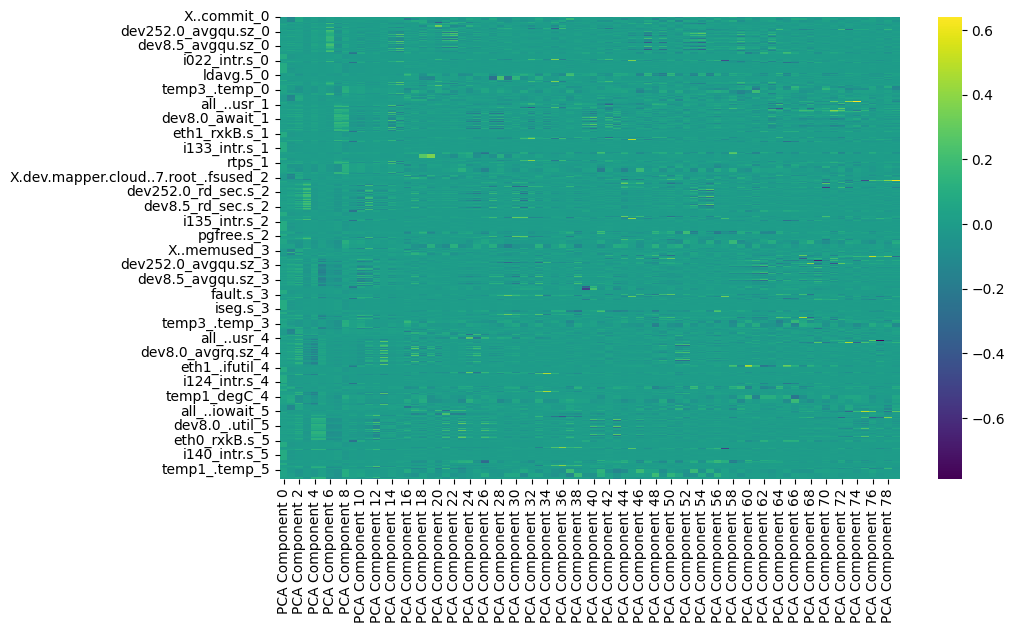

ReadsAvg
WritesAvg


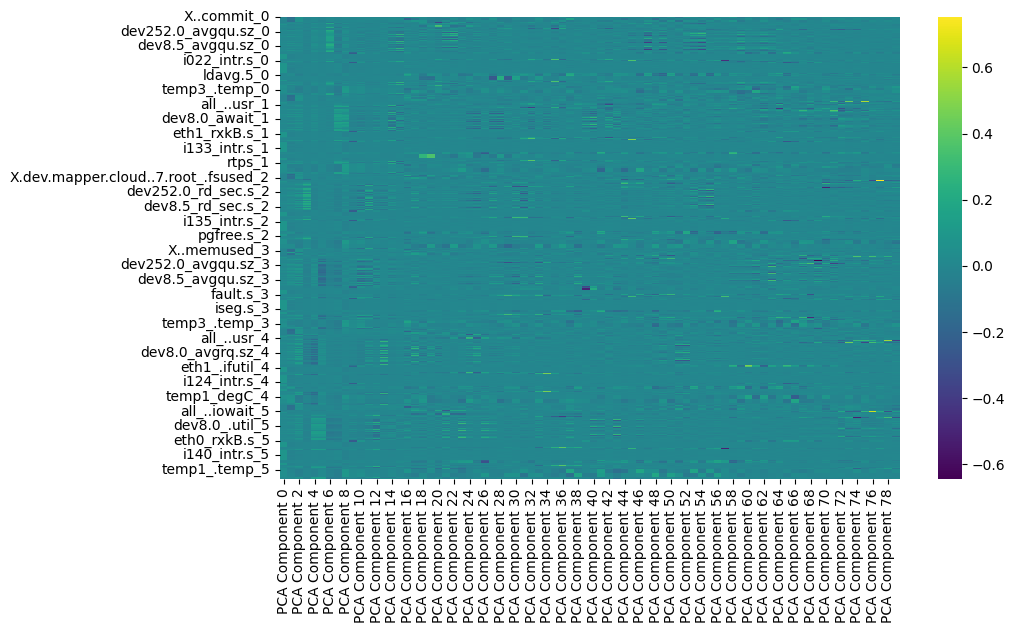

WritesAvg
Metrics for column "ReadsAvg":
Mean Absolute Error: 1.1145671991693356
Mean Squared Error: 2.976335508082847
Root Mean Squared Error: 1.7252059320796596


Metrics for column "WritesAvg":
Mean Absolute Error: 2.444547117674436
Mean Squared Error: 18.381940944951545
Root Mean Squared Error: 4.287416581690137




In [7]:
# Создаем пустой словарь для хранения метрик для каждого столбца
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Y_metrics_dict = {}
Y_models_dict = {}

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    print(column)
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)
    # Выбираем текущий столбец как целевую переменную
    X = df_combined
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pca = PCA(n_components=80)
    pca.fit(X_train_scaled)
    X_train_scaled_pca = pca.transform(X_train_scaled)
    X_test_scaled_pca = pca.transform(X_test_scaled)
    evr = pca.explained_variance_ratio_
    cvr = np.cumsum(pca.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Cumulative Variance Ratio'] = cvr
    pca_df['Explained Variance Ratio'] = evr
    
    
    pca_dims = []
    for x in range(len(pca_df)):
        pca_dims.append('PCA Component {}'.format(x))
    pca_df = pd.DataFrame(pca.components_, columns=df_combined.columns, index=pca_dims)
    #print(pca_test_df.head(10).T)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pca_df.T, cmap='viridis')
    plt.show()

    # Инициализируем модель
    regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)

    # Обучаем модель
    regressor.fit(X_train_scaled_pca, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'united_pca_model_{column}.joblib')

    # Делаем прогноз на тестовом наборе
    y_pred = regressor.predict(X_test_scaled_pca)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }
    print(column)

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


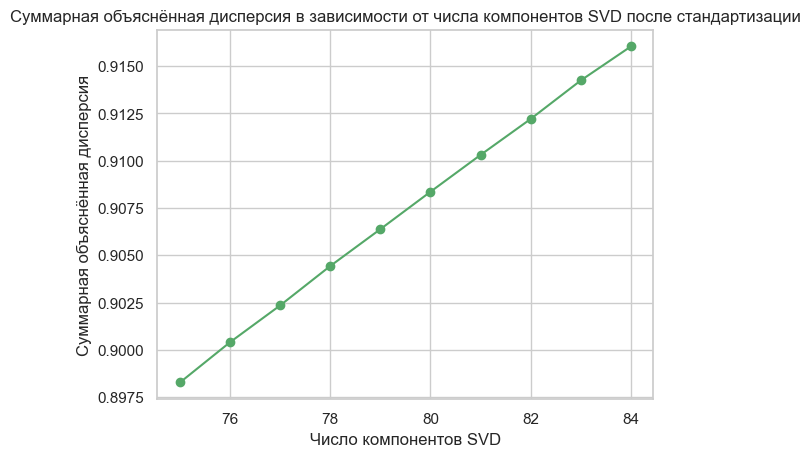

In [14]:
# без пропусков в данных
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Стандартизация данных перед применением SVD
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_combined)

# Список для хранения ошибок восстановления для SVD после стандартизации
# Подготовка списка для хранения объяснённой дисперсии для SVD
explained_variance_ratio_svd = []

for n_components in range(75, 85):
    svd = TruncatedSVD(n_components=n_components, random_state=0)
    svd.fit(data_scaled)  # Обучение SVD на стандартизированных данных
    explained_variance_ratio_svd.append(svd.explained_variance_ratio_.sum())  # Суммарная объяснённая дисперсия
    
    #print(f"SVD после стандартизации - Количество компонент: {n_components}, Суммарная объяснённая дисперсия: {svd.explained_variance_ratio_.sum()}")

# Визуализация суммарной объяснённой дисперсии для SVD после стандартизации
plt.figure()
plt.plot(range(75, 85), explained_variance_ratio_svd, marker='o', color='g')
plt.xlabel('Число компонентов SVD')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.title('Суммарная объяснённая дисперсия в зависимости от числа компонентов SVD после стандартизации')
plt.grid(True)
plt.show()
# 19 компонент

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Создаем пустой словарь для хранения метрик для каждого столбца
Y_metrics_dict = {}
Y_models_dict = {}
scalers_dict = {}
svds_dict = {}  # Словарь для хранения SVD моделей

# Итерируемся по всем столбцам, кроме целевой переменной
for column in Y_data.columns:
    # Установка параметров модели в зависимости от целевой переменной
    maxdepth = (None if column == 'ReadsAvg' else 20)
    minsmplssplit = (7 if column == 'ReadsAvg' else 5)
    n = (470 if column == 'ReadsAvg' else 455)

    X = df_combined
    y = Y_data[column]

    # Разбиваем данные на тренировочный и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # Стандартизация данных
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scalers_dict[column] = scaler
    joblib.dump(scaler, f'scaler_{column}.joblib')

    # Применение SVD
    svd = TruncatedSVD(n_components=80)
    svd.fit(X_train_scaled)
    X_train_scaled_svd = svd.transform(X_train_scaled)
    X_test_scaled_svd = svd.transform(X_test_scaled)
    svds_dict[column] = svd
    joblib.dump(svd, f'svd_{column}.joblib')

    # Инициализируем и обучаем модель RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators=n, bootstrap=False, max_depth=maxdepth, max_features='log2', min_samples_leaf=3, min_samples_split=minsmplssplit, random_state=42)
    regressor.fit(X_train_scaled_svd, y_train)
    Y_models_dict[column] = regressor
    joblib.dump(regressor, f'model_hyper_{column}.joblib')

    # Делаем прогноз на тестовом наборе с использованием преобразованных через SVD данных
    y_pred = regressor.predict(X_test_scaled_svd)

    # Вычисляем метрики и сохраняем их в словарь
    Y_metrics_dict[column] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }

# Выводим метрики для каждого столбца
for column, metrics in Y_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


Metrics for column "ReadsAvg":
Mean Absolute Error: 1.1144219667509128
Mean Squared Error: 2.9881869230558706
Root Mean Squared Error: 1.7286373023442108


Metrics for column "WritesAvg":
Mean Absolute Error: 2.441405305812892
Mean Squared Error: 18.695327653578502
Root Mean Squared Error: 4.323809391448529




In [ ]:
*Дальше не читать*

In [48]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
np.random.seed(42)

results = []

# Для библиотеки Surprise нужен Reader, определяющий диапазон рейтингов
reader = Reader(rating_scale=(0, 500))  # Примерный диапазон оценок

for column in Y_data.columns:
    # Собираем датасет для Surprise
    df = pd.concat([data, Y_data[[column]]], axis=1).reset_index()
    original_values = df[[column]].copy()
    
    # Искусственно создаем пропуски в Y_data
    mask = np.random.choice([True, False], size=len(df), p=[.7, .3])
    df.loc[mask, column] = np.nan
    
    df_melt = df.melt(id_vars='index', value_vars=column)
    df_melt.dropna(inplace=True)  # Удаление строк с пропущенными значениями для обучения

    # Создаем набор данных для Surprise
    dataset = Dataset.load_from_df(df_melt[[df_melt.columns]], reader)

    # Обучаем SVD модель
    algo = SVD()
    training_set = dataset.build_full_trainset()
    algo.fit(training_set)

    # Предсказываем пропущенные значения
    # (пример: здесь нужно адаптировать код для вашего случая предсказаний)
    # Для каждого пропущенного значения в исходных данных
    # можно использовать algo.predict(uid, iid) для получения предсказаний

    # Пример предсказания (замените 'user_id' и 'item_id' на соответствующие значения)
    # predictions = [algo.predict(user_id, item_id).est for user_id, item_id in ...]

    # Здесь должен быть ваш код для вычисления MSE и RMSE на основе предсказаний

    # results.append(...)  # Добавляем результаты в список

# Вывод результатов
# for result in results:
#     print(f"{result['Column']}: MSE = {result['MSE']}, RMSE = {result['RMSE']}")


       ReadsAvg
6       74.3802
10      53.7797
29      53.3257
32      53.5953
37      53.7377
...         ...
24183   58.8182
24186   57.2479
24193   59.7600
24198   58.2586
24208   54.0056

[2449 rows x 1 columns]
6        56.559561
10       56.559561
29       56.559561
32       56.559561
37       56.559561
           ...    
24183    56.559561
24186    56.559561
24193    56.559561
24198    56.559561
24208    56.559561
Name: ReadsAvg, Length: 2449, dtype: float64
       WritesAvg
4       122.6427
32      106.5516
46      105.4131
55      109.2273
58      108.1939
...          ...
24174   116.2990
24191   126.5033
24197   123.5977
24199   116.7642
24201   116.6016

[2418 rows x 1 columns]
4        112.505206
32       112.505206
46       112.505206
55       112.505206
58       112.505206
            ...    
24174    112.505206
24191    112.505206
24197    112.505206
24199    112.505206
24201    112.505206
Name: WritesAvg, Length: 2418, dtype: float64
ReadsAvg: MSE = 77.63317424263509,

In [34]:
negative_counts = data.lt(0).sum()
negative_counts[negative_counts > 0]

campg.s      297
frmpg.s    17618
dtype: int64

*Дальше не смотреть*

In [17]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from joblib import load

In [19]:
modelR = modelR = load('C:\\Users\\Asus\\Desktop\\archive\\unpacked\\overlapping_inputs_shared_tasks_24_agents\\kv\\models\\model_hyper_ReadsAvg.joblib')
modelW = load('C:\\Users\\Asus\\Desktop\\archive\\unpacked\\overlapping_inputs_shared_tasks_24_agents\\kv\\models\\model_hyper_WritesAvg.joblib')

In [20]:
data = pd.read_csv('0_1_X.csv', sep=';')

In [21]:
threshold = 0.9

# Создание списка столбцов для удаления
columns_to_drop = []
total_rows = len(data)
for column in data.columns:
    value_counts = data[column].value_counts(normalize=True)  # Подсчет относительной частоты значений
    if value_counts.iloc[0] > threshold:
        columns_to_drop.append(column)

# Удаление столбцов, в которых более 90% значений одинаковые
data = data.drop(columns=columns_to_drop)
columns_with_cpu = [col for col in data.columns if 'cpu' in col]

# Удаление столбцов, содержащих 'cpu'
data = data.drop(columns=columns_with_cpu, axis=1)
data

,X..commit,X..memused,X..swpcad,X..swpused,X.dev.mapper.cloud..3.root_.fsused,X.dev.mapper.cloud..3.root_.ufsused,all_..idle,all_..iowait,all_..soft,all_..sys,...,temp1_.temp,temp1_degC,temp2_.temp,temp2_degC,temp3_.temp,temp3_degC,temp4_.temp,temp4_degC,tps,wtps
0,27.18,78.70,16.48,0.22,63.88,68.96,95.89,0.08,0.08,0.38,...,34.29,24.00,30.71,21.50,32.68,22.88,32.68,22.88,13.0,0.0
1,27.18,78.73,16.48,0.22,63.88,68.96,96.82,0.29,0.08,0.50,...,34.29,24.00,30.71,21.50,32.86,23.00,32.86,23.00,33.0,11.0
2,27.18,78.74,16.48,0.22,63.88,68.96,96.32,0.08,0.08,0.42,...,34.29,24.00,31.43,22.00,32.86,23.00,32.86,23.00,8.0,0.0
3,27.18,78.74,16.48,0.22,63.88,68.96,97.40,0.13,0.08,0.46,...,34.29,24.00,31.43,22.00,32.86,23.00,32.86,23.00,7.0,0.0
4,27.18,78.74,16.48,0.22,63.88,68.96,98.36,0.08,0.04,0.38,...,34.11,23.88,31.43,22.00,33.04,23.12,33.04,23.12,16.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24220,27.37,97.79,51.42,0.43,64.49,69.58,98.96,0.04,0.08,0.46,...,35.00,24.50,33.57,23.50,34.29,24.00,34.29,24.00,10.0,6.0
24221,27.37,97.79,51.42,0.43,64.49,69.58,98.92,0.08,0.00,0.50,...,35.00,24.50,33.57,23.50,34.46,24.12,34.46,24.12,3.0,0.0
24222,27.37,97.80,51.42,0.43,64.49,69.58,98.83,0.21,0.08,0.63,...,35.00,24.50,33.57,23.50,34.46,24.12,34.46,24.12,80.0,0.0
24223,27.37,97.83,51.42,0.43,64.49,69.58,94.71,2.37,0.08,0.75,...,35.18,24.62,33.57,23.50,34.29,24.00,34.29,24.00,1332.0,3.0


In [22]:
Y_data = pd.read_csv('0_1_Y.csv', sep=';')
Y_data = Y_data.drop("TimeStamp", axis=1)
Y_data

,ReadsAvg,WritesAvg
0,92.1296,155.6459
1,63.9122,130.1385
2,83.8677,109.7287
3,101.1504,109.3372
4,64.9093,122.6427
...,...,...
24220,55.6104,114.7640
24221,58.1160,111.3047
24222,55.2049,112.5828
24223,54.3726,112.0748


In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

data.rename(columns={'X.dev.mapper.cloud..3.root_.fsused': 'X.dev.mapper.cloud..2.root_.fsused'}, inplace=True)
data.rename(columns={'X.dev.mapper.cloud..3.root_.ufsused': 'X.dev.mapper.cloud..2.root_.ufsused'}, inplace=True)
# Инициализация словаря для хранения новых метрик
new_metrics_dict = {}

# Путь к директории, где хранятся все joblib файлы
models_dir = 'models/'

# Перебираем целевые переменные
for column in Y_data.columns:
    # Формируем пути к файлам
    scaler_path = f'{models_dir}scaler_{column}.joblib'
    pca_path = f'{models_dir}pca_{column}.joblib'
    model_path = f'{models_dir}model_hyper_{column}.joblib'
    
    # Загружаем сохраненный scaler, pca и модель
    scaler = joblib.load(scaler_path)
    pca = joblib.load(pca_path)
    model = joblib.load(model_path)
    
    # Предобработка новых данных
    X_new_scaled = scaler.transform(data)
    X_new_scaled_pca = pca.transform(X_new_scaled)
    
    # Получение предсказаний на новых данных
    y_pred_new = model.predict(X_new_scaled_pca)
    y_true_new = Y_data[column]  # Истинные значения целевой переменной
    
    # Вычисление и сохранение новых метрик
    mae = mean_absolute_error(y_true_new, y_pred_new)
    mse = mean_squared_error(y_true_new, y_pred_new)
    rmse = np.sqrt(mse)
    
    new_metrics_dict[column] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse
    }

# Вывод метрик для каждой целевой переменной
for column, metrics in new_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


Metrics for column "ReadsAvg":
Mean Absolute Error: 9.012597606712491
Mean Squared Error: 117.04891058133427
Root Mean Squared Error: 10.81891448257792


Metrics for column "WritesAvg":
Mean Absolute Error: 16.20520499727669
Mean Squared Error: 377.7173148214817
Root Mean Squared Error: 19.43495085719235




In [26]:
Y_data.describe()

,ReadsAvg,WritesAvg
count,24225.000000,24225.000000
mean,56.585499,112.481487
std,8.394318,15.085795
min,51.016200,101.923200
25%,53.144800,105.852300
50%,54.417500,108.329700
75%,56.663100,112.856700
max,313.110200,476.738600


In [31]:
data = pd.read_csv('1_0_X.csv', sep=';')
threshold = 0.9

# Создание списка столбцов для удаления
columns_to_drop = []
total_rows = len(data)
for column in data.columns:
    value_counts = data[column].value_counts(normalize=True)  # Подсчет относительной частоты значений
    if value_counts.iloc[0] > threshold:
        columns_to_drop.append(column)

# Удаление столбцов, в которых более 90% значений одинаковые
data = data.drop(columns=columns_to_drop)
columns_with_cpu = [col for col in data.columns if 'cpu' in col]

# Удаление столбцов, содержащих 'cpu'
data = data.drop(columns=columns_with_cpu, axis=1)
data = data.drop(columns=['eth0_rxkB.s', 'eth0_rxpck.s', 'i117_intr.s'], axis=1)
data
Y_data = pd.read_csv('1_0_Y.csv', sep=';')
Y_data = Y_data.drop("TimeStamp", axis=1)
Y_data
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# Инициализация словаря для хранения новых метрик
new_metrics_dict = {}

# Путь к директории, где хранятся все joblib файлы
models_dir = 'models/'

# Перебираем целевые переменные
for column in Y_data.columns:
    # Формируем пути к файлам
    scaler_path = f'{models_dir}scaler_{column}.joblib'
    pca_path = f'{models_dir}pca_{column}.joblib'
    model_path = f'{models_dir}model_hyper_{column}.joblib'
    
    # Загружаем сохраненный scaler, pca и модель
    scaler = joblib.load(scaler_path)
    pca = joblib.load(pca_path)
    model = joblib.load(model_path)
    
    # Предобработка новых данных
    X_new_scaled = scaler.transform(data)
    X_new_scaled_pca = pca.transform(X_new_scaled)
    
    # Получение предсказаний на новых данных
    y_pred_new = model.predict(X_new_scaled_pca)
    y_true_new = Y_data[column]  # Истинные значения целевой переменной
    
    # Вычисление и сохранение новых метрик
    mae = mean_absolute_error(y_true_new, y_pred_new)
    mse = mean_squared_error(y_true_new, y_pred_new)
    rmse = np.sqrt(mse)
    
    new_metrics_dict[column] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse
    }

# Вывод метрик для каждой целевой переменной
for column, metrics in new_metrics_dict.items():
    print(f'Metrics for column "{column}":')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value}')
    print('\n')


Metrics for column "ReadsAvg":
Mean Absolute Error: 8.714322233975349
Mean Squared Error: 109.50633588440733
Root Mean Squared Error: 10.464527504116338


Metrics for column "WritesAvg":
Mean Absolute Error: 16.025757658399243
Mean Squared Error: 419.51487604979536
Root Mean Squared Error: 20.482062299724493


